<a href="https://colab.research.google.com/github/srihiyacine/Dummy-Marketing-and-Sales-Data-EDA---Linear-Regression/blob/main/Dummy_Marketing_and_Sales_Data_(EDA)_Linear_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

In [ ]:
df = pd.read_csv("/content/Dummy Data HSS.csv")

#PART01

In [ ]:
df.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [ ]:
df.columns

Index(['TV', 'Radio', 'Social Media', 'Influencer', 'Sales'], dtype='object')

In [ ]:
df.rename(columns={'Social Media':'Social_Media'},inplace=True)

In [ ]:
df.columns

Index(['TV', 'Radio', 'Social_Media', 'Influencer', 'Sales'], dtype='object')

In [ ]:
df.head()

,TV,Radio,Social_Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [ ]:
df.shape

(4572, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social_Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [ ]:
df.isnull().sum()

TV              10
Radio            4
Social_Media     6
Influencer       0
Sales            6
dtype: int64

In [ ]:
df.dropna(axis=0, inplace=True)

In [ ]:
df.head()

,TV,Radio,Social_Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [ ]:
df["Influencer"].value_counts()

Influencer
Mega     1152
Micro    1148
Nano     1134
Macro    1112
Name: count, dtype: int64

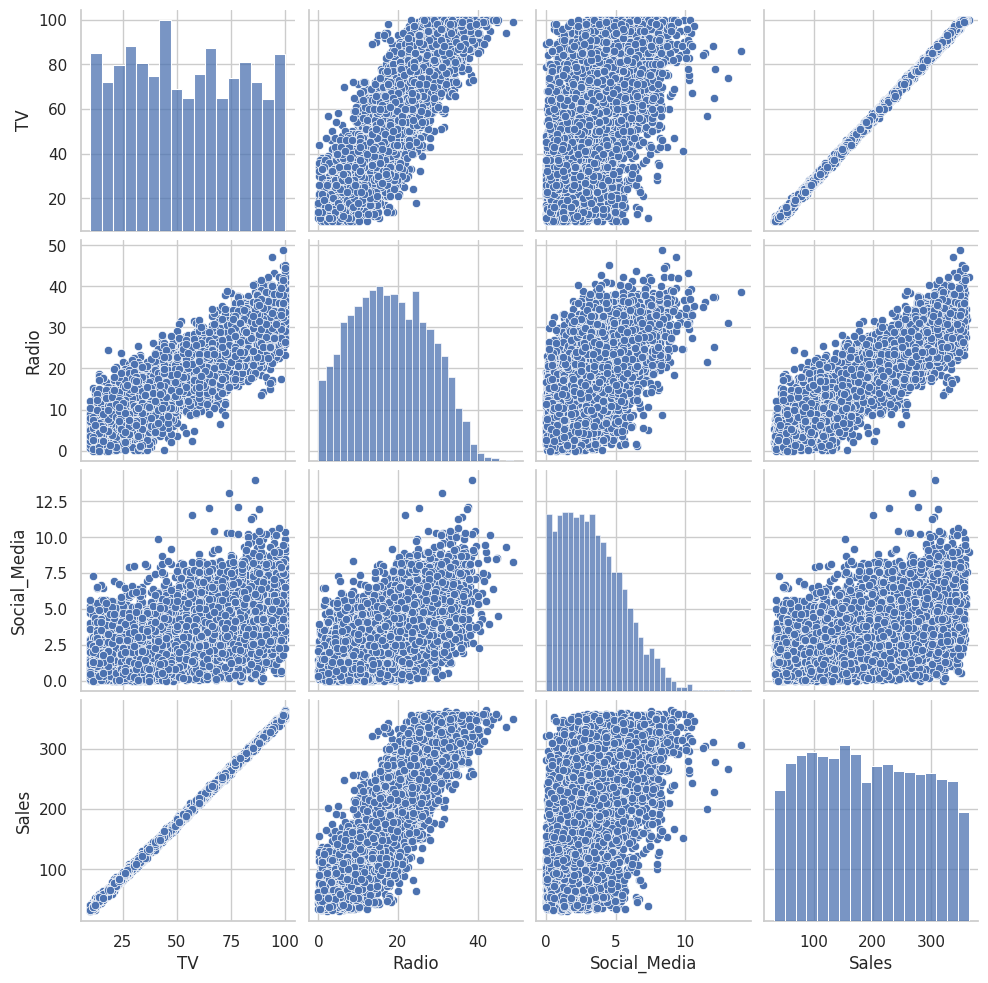

In [ ]:
sns.pairplot(df)

In [ ]:
print(df.groupby('Influencer')['Sales'].mean())

Influencer
Macro    196.066150
Mega     190.412908
Micro    191.578370
Nano     191.708827
Name: Sales, dtype: float64


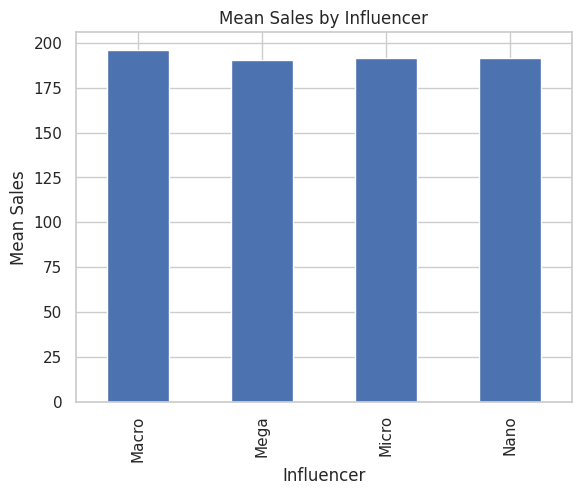

In [ ]:
mean_sales_by_influencer = df.groupby('Influencer')['Sales'].mean()

# Plot the result
mean_sales_by_influencer.plot(kind='bar')
plt.xlabel('Influencer')
plt.ylabel('Mean Sales')
plt.title('Mean Sales by Influencer')
plt.show()

<ipython-input-70-9ccda9844ff6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Influencer', y='Sales', data=mean_sales_by_influencer, palette='Set3')


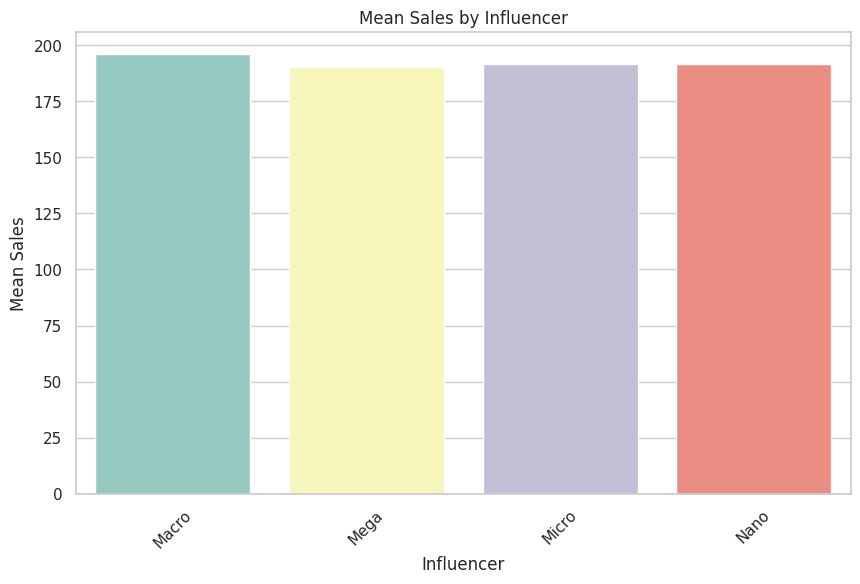

In [ ]:
mean_sales_by_influencer = df.groupby('Influencer')['Sales'].mean().reset_index()

# Plot the result using Seaborn
plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(x='Influencer', y='Sales', data=mean_sales_by_influencer, palette='Set3')
plt.xlabel('Influencer')
plt.ylabel('Mean Sales')
plt.title('Mean Sales by Influencer')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
df.describe()

,TV,Radio,Social_Media,Sales
count,4546.000000,4546.000000,4546.000000,4546.000000
mean,54.062912,18.157533,3.323473,192.413332
std,26.104942,9.663260,2.211254,93.019873
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.555355,1.530822,112.434612
50%,53.000000,17.859513,3.055565,188.963678
75%,77.000000,25.640603,4.804919,272.324236
max,100.000000,48.871161,13.981662,364.079751


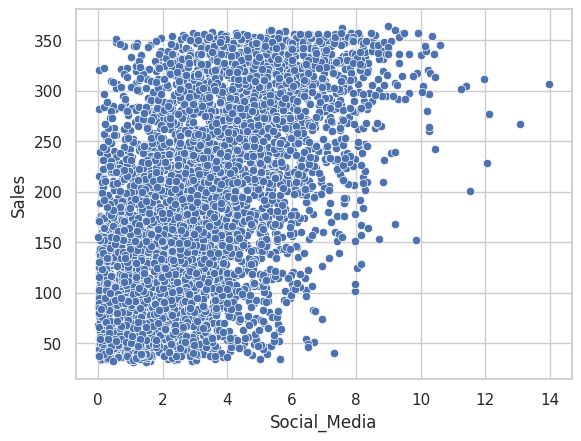

In [ ]:
sns.scatterplot(data = df, x = 'Social_Media', y='Sales')
plt.show()

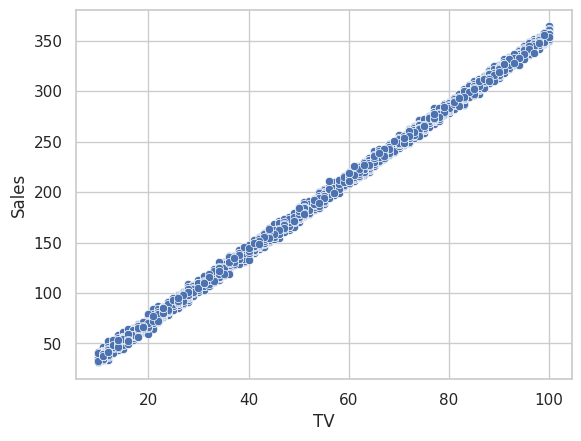

In [ ]:
sns.scatterplot(data = df, x = 'TV', y='Sales')
plt.show()

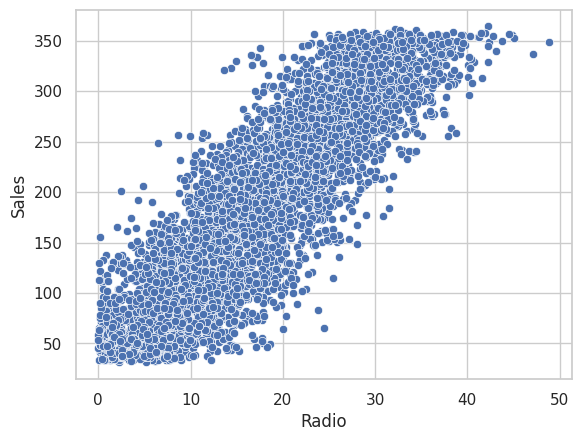

In [ ]:
sns.scatterplot(data = df, x = 'Radio', y='Sales')
plt.show()

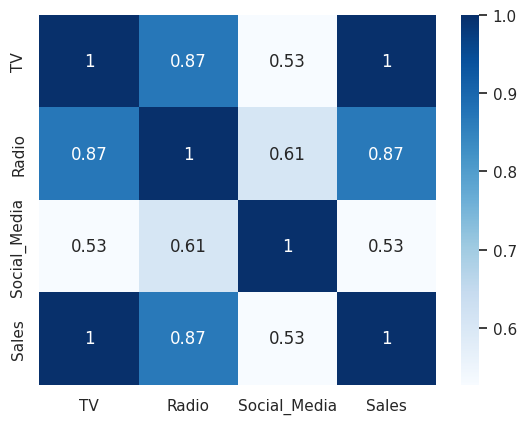

In [ ]:
df_0 = df.drop('Influencer', axis = 1)
sns.heatmap(data=df_0.corr(), annot=True, cmap='Blues')
plt.show()

In [ ]:
X = df['TV']
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
print(X_train.shape, y_train.shape)

(3409,) (3409,)


In [ ]:
print(X_test.shape, y_test.shape)

(1137,) (1137,)


In [ ]:
type(X_train)

pandas.core.series.Series

In [ ]:
X_train_reshaped = X_train.values.reshape(-1, 1)

# Print the reshaped DataFrame
print(X_train_reshaped)

[[46.]
 [13.]
 [34.]
 ...
 [35.]
 [38.]
 [66.]]


In [ ]:
model = LinearRegression()
model.fit(X_train_reshaped, y_train)

LinearRegression()

1. **Coefficient of Determination ($ R^2 $)**:
   - The coefficient of determination measures the proportion of the variance in the dependent variable (target) that is predictable from the independent variables (features).
   - Equation: $ R^2 = 1 - \frac{{\text{SSR}}}{{\text{SST}}} $, where:
     - $ \text{SSR} $ (Sum of Squared Residuals) is the sum of squared differences between the predicted values and the mean of the dependent variable.
     - $ \text{SST} $ (Total Sum of Squares) is the sum of squared differences between the actual values and the mean of the dependent variable.
   - $ R^2 $ ranges from 0 to 1, where 1 indicates a perfect fit.

2. **Mean Absolute Error (MAE)**:
   - MAE measures the average absolute difference between the predicted values and the actual values.
   - Equation: $ \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| $, where:
     - $ y_i $ is the actual value.
     - $ \hat{y}_i $ is the predicted value.
     - $ n $ is the number of samples.

3. **Mean Squared Error (MSE)**:
   - MSE measures the average squared difference between the predicted values and the actual values.
   - Equation: $ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $, where:
     - $ y_i $ is the actual value.
     - $ \hat{y}_i $ is the predicted value.
     - $ n $ is the number of samples.

4. **Root Mean Squared Error (RMSE)**:
   - RMSE is the square root of MSE, which gives a measure of the average magnitude of the errors in the same unit as the dependent variable.
   - Equation: $ \text{RMSE} = \sqrt{\text{MSE}} $.

These metrics are commonly used to evaluate the performance of regression models. A good model will have a high $ R^2 $ value, and low values for MAE, MSE, and RMSE, indicating that the model's predictions are close to the actual values.


In [ ]:
# Evaluate the model performance on the training data
r_sq = model.score(X_train_reshaped, y_train)
y_pred_train = model.predict(X_train_reshaped)
print('Coefficient of determination:', r_sq)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.9989846444561821
R^2: 0.9989846444561821
MAE: 2.380958941307046
MSE: 8.79402040571796
RMSE: 2.965471363159314


In [ ]:
X_test_reshaped = X_test.values.reshape(-1, 1)
y_pred_test = model.predict(X_test_reshaped)

In [ ]:
# Evaluate the model performance on the testing data
r_sq_test = model.score(X_test_reshaped, y_test)
y_pred_test = model.predict(X_test_reshaped)
print('Coefficient of determination:', r_sq_test)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.9990250362892487
R^2: 0.9990250362892487
MAE: 2.316281521722767
MSE: 8.404072041770515
RMSE: 2.898977758067577


In [ ]:
# Create a `results` dataframe
results = pd.DataFrame(data={'actual': y_test,'predicted': y_pred_test.ravel()})
results['residual'] = results['actual']- results['predicted']
results.head()

,actual,predicted,residual
497,55.261284,53.204680,2.056604
3800,67.574904,71.019063,-3.444160
24,272.250108,266.977276,5.272831
1918,195.102176,195.719744,-0.617568
142,273.960377,274.103030,-0.142652


Text(0.5, 1.0, 'Actual vs. predicted')

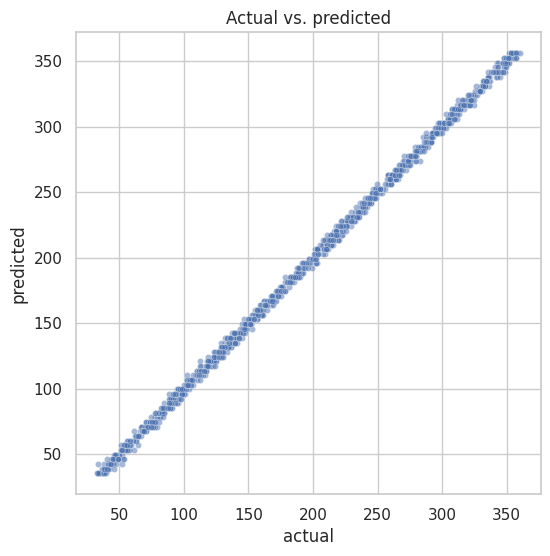

In [ ]:
# Create a scatterplot to visualize `predicted` over `actual`
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='actual', y='predicted', data=results,
                s=20,
                alpha=0.5,
                ax=ax)
# Draw an x=y line to show what the results would be if the model were perfect
#plt.plot([0,400], [0,400], c='red', linewidth=2)
plt.title('Actual vs. predicted')

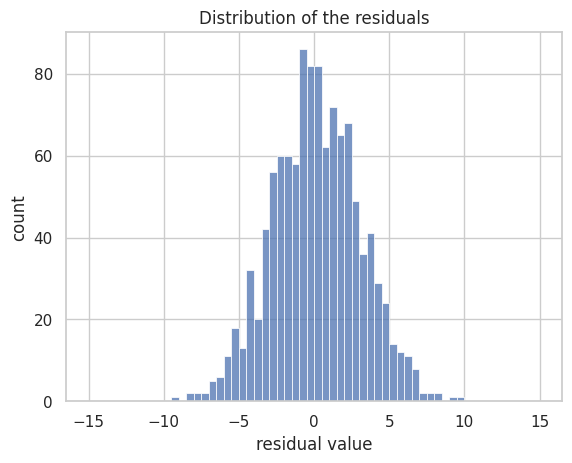

In [ ]:
sns.histplot(results['residual'], bins=np.arange(-15,15.5,0.5))
plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count');

In [ ]:
results['residual'].mean()

0.1292034893290768

In [ ]:
results['residual'].std()

2.8973715253376877

In [ ]:
results.describe()

,actual,predicted,residual
count,1137.000000,1137.000000,1137.000000
mean,192.831314,192.702110,0.129203
std,92.884174,92.981875,2.897372
min,32.566825,35.390298,-9.006241
25%,116.783844,117.336459,-1.859318
50%,188.723202,188.593991,0.105647
75%,272.549011,274.103030,2.098488
max,360.109683,356.049191,9.682883


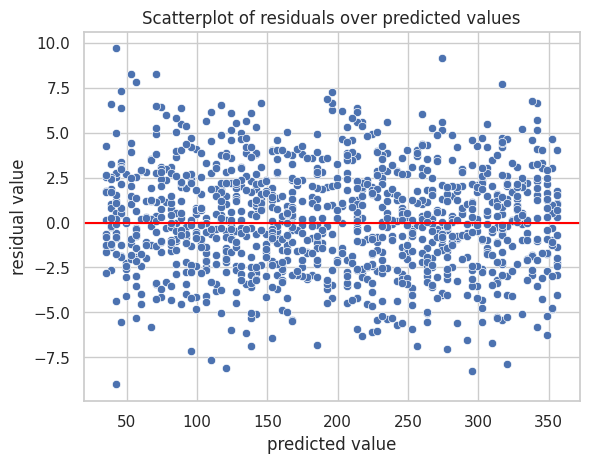

In [ ]:
# Create a scatterplot of `residuals` over `predicted`
sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()

In [ ]:
print('Coefficient:', model.coef_[0])
print('Intercept:', model.intercept_)

Coefficient: 3.56287659699994
Intercept: -0.23846846874886296


#PART 02

In [ ]:
encoded_df = pd.get_dummies(df['Influencer'], prefix='encoded')

# Concatenate the original DataFrame with the encoded DataFrame
df = pd.concat([df, encoded_df], axis=1)

In [ ]:
df.drop(columns=['Influencer'], inplace=True)

In [ ]:
df.head()

,TV,Radio,Social_Media,Sales,encoded_Macro,encoded_Mega,encoded_Micro,encoded_Nano
0,16.0,6.566231,2.907983,54.732757,False,True,False,False
1,13.0,9.237765,2.409567,46.677897,False,True,False,False
2,41.0,15.886446,2.913410,150.177829,False,True,False,False
3,83.0,30.020028,6.922304,298.246340,False,True,False,False
4,15.0,8.437408,1.405998,56.594181,False,False,True,False


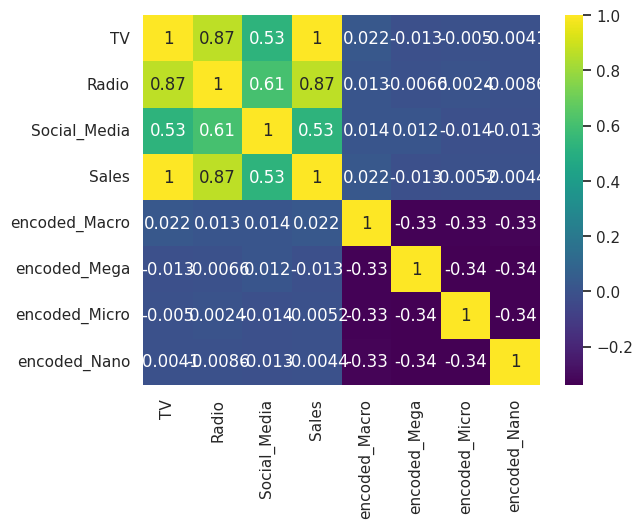

In [ ]:
sns.heatmap(data=df.corr(), annot=True, cmap='viridis')
plt.show()

In [ ]:
X = df.drop(columns=['Sales'])
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
model = LinearRegression()
model.fit(X_train , y_train)

LinearRegression()

In [ ]:
print('Coefficient:', model.coef_)
print('Intercept:', model.intercept_)

Coefficient: [ 3.56436284e+00 -1.22193770e-03 -2.44958929e-02  3.13198182e-02
  6.82527534e-02 -3.20471279e-02 -6.75254437e-02]
Intercept: -0.2153953419745278


In [ ]:
print(X_train.shape, y_train.shape)

(3409, 7) (3409,)


In [ ]:
print(X_test.shape, y_test.shape)

(1137, 7) (1137,)


In [ ]:
type(X_train)

pandas.core.frame.DataFrame

In [ ]:
# Evaluate the model performance on the training data
r_sq = model.score(X_train, y_train)
y_pred_train = model.predict(X_train)
print('Coefficient of determination:', r_sq)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.9989852236434955
R^2: 0.9989852236434955
MAE: 2.3804671089186873
MSE: 8.78900404954223
RMSE: 2.9646254484407013


In [ ]:
# Evaluate the model performance on the testing data
r_sq_test = model.score(X_test, y_test)
y_pred_test = model.predict(X_test)
print('Coefficient of determination:', r_sq_test)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.9990226939201169
R^2: 0.9990226939201169
MAE: 2.319479728993359
MSE: 8.424262987048325
RMSE: 2.902458093934919


In [ ]:
# Create a `results` dataframe
results = pd.DataFrame(data={'actual': y_test,'predicted': y_pred_test.ravel()})
results['residual'] = results['actual']- results['predicted']
results.head()

,actual,predicted,residual
497,55.261284,53.157513,2.103772
3800,67.574904,71.067625,-3.492722
24,272.250108,267.024844,5.225264
1918,195.102176,195.801408,-0.699232
142,273.960377,273.943835,0.016542


Text(0.5, 1.0, 'Actual vs. predicted')

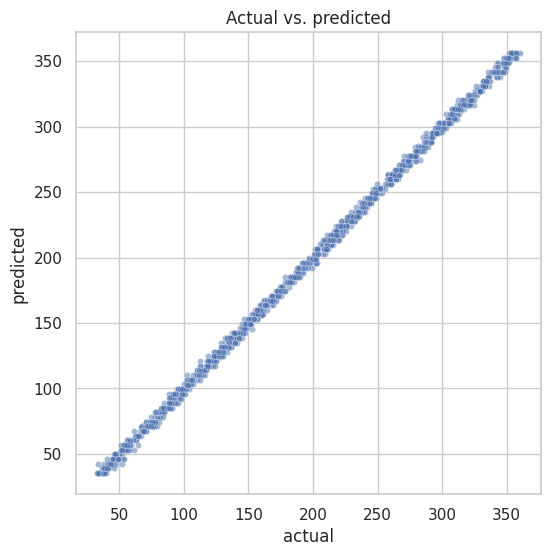

In [ ]:
# Create a scatterplot to visualize `predicted` over `actual`
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='actual', y='predicted', data=results,
                s=20,
                alpha=0.5,
                ax=ax)
# Draw an x=y line to show what the results would be if the model were perfect
#plt.plot([0,400], [0,400], c='red', linewidth=2)
plt.title('Actual vs. predicted')

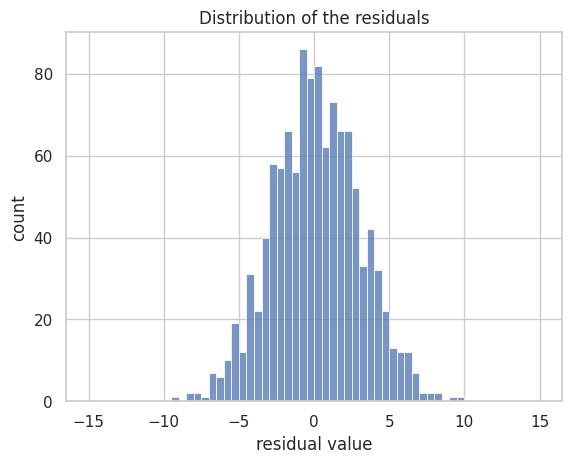

In [ ]:
sns.histplot(results['residual'], bins=np.arange(-15,15.5,0.5))
plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count');

In [ ]:
results['residual'].mean()

0.12982411287827383

In [ ]:
results['residual'].std()

2.900829118492191

In [ ]:
results.describe()

,actual,predicted,residual
count,1137.000000,1137.000000,1137.000000
mean,192.831314,192.701489,0.129824
std,92.884174,92.982148,2.900829
min,32.566825,35.227997,-9.039651
25%,116.783844,117.246618,-1.806439
50%,188.723202,188.634450,0.098090
75%,272.549011,273.943835,2.099887
max,360.109683,356.135926,9.686525


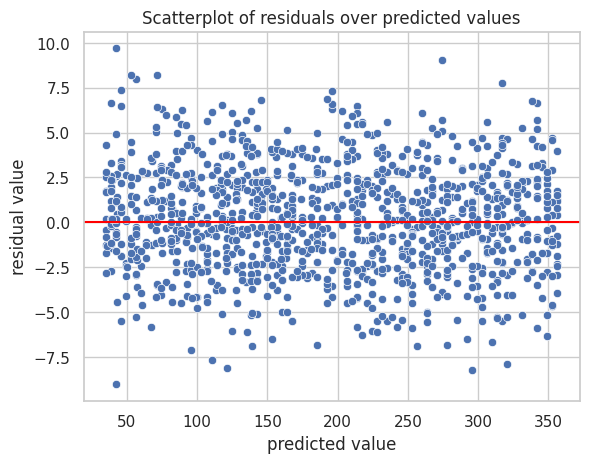

In [ ]:
# Create a scatterplot of `residuals` over `predicted`
sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()